In [16]:
import numpy as np
from skimage import io
from scipy.ndimage import convolve
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [17]:
image1 = io.imread("grass-hopper.jpg")
img_gray1 = rgb2gray(image1)
image2 = io.imread("eagle.jpg")
img_gray2 = rgb2gray(image2)
image3 = io.imread("namib.jpg")
img_gray3 =  rgb2gray(image3)
image4 = io.imread("panda.jpg")
img_gray4 =  rgb2gray(image4)

In [18]:
def convolve_rgb(image,kernel):
  return np.dstack([
    convolve(image[:, :, channel], kernel, mode="constant", cval=0.0)
    for channel in range(3)
  ])

# **Sharpen**

(-0.5, 988.5, 988.5, -0.5)

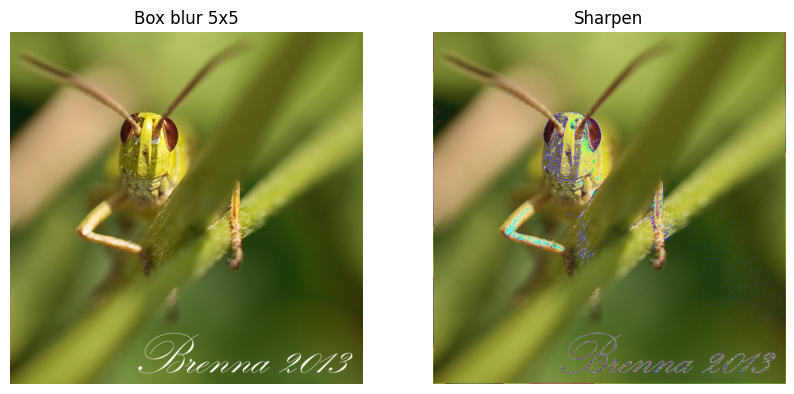

In [37]:
kernel_sharpen = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image1)
axes[0].set_title('Box blur 5x5')
axes[0].axis('off')

axes[1].imshow(convolve_rgb(image1, kernel_sharpen))
axes[1].set_title('Sharpen')
axes[1].axis('off')

# **Blur**

### Box Blur

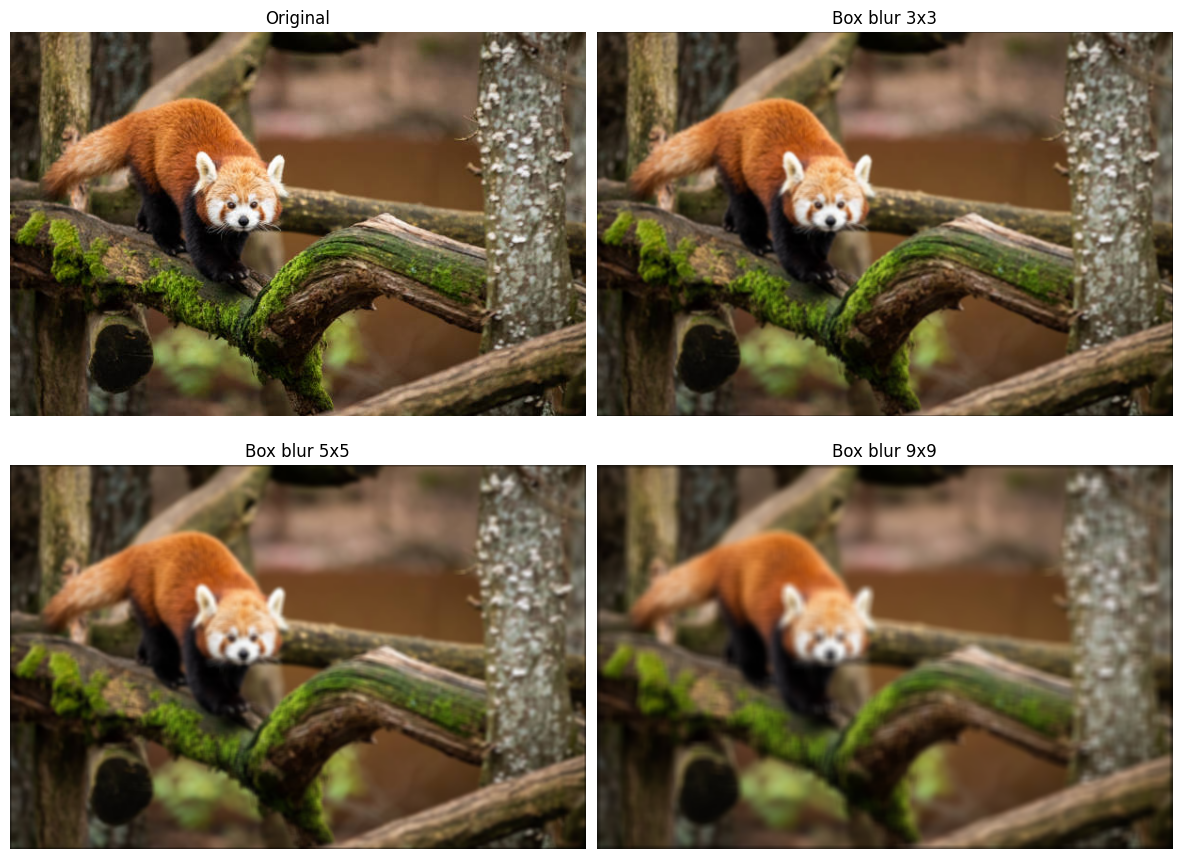

In [39]:
def avrege_kernel(size):
  return np.ones([size, size]) / (size ** 2)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0, 0].imshow(image4)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')
imgB = convolve_rgb(image1, avrege_kernel(5))
axes[0, 1].imshow(convolve_rgb(image4, avrege_kernel(3)))
axes[0, 1].set_title('Box blur 3x3')
axes[0, 1].axis('off')

axes[1, 0].imshow(convolve_rgb(image4, avrege_kernel(5)))
axes[1, 0].set_title('Box blur 5x5')
axes[1, 0].axis('off')

axes[1, 1].imshow(convolve_rgb(image4, avrege_kernel(9)))
axes[1, 1].set_title('Box blur 9x9')
axes[1, 1].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=-0.4)
plt.show()

### Gaussian blur

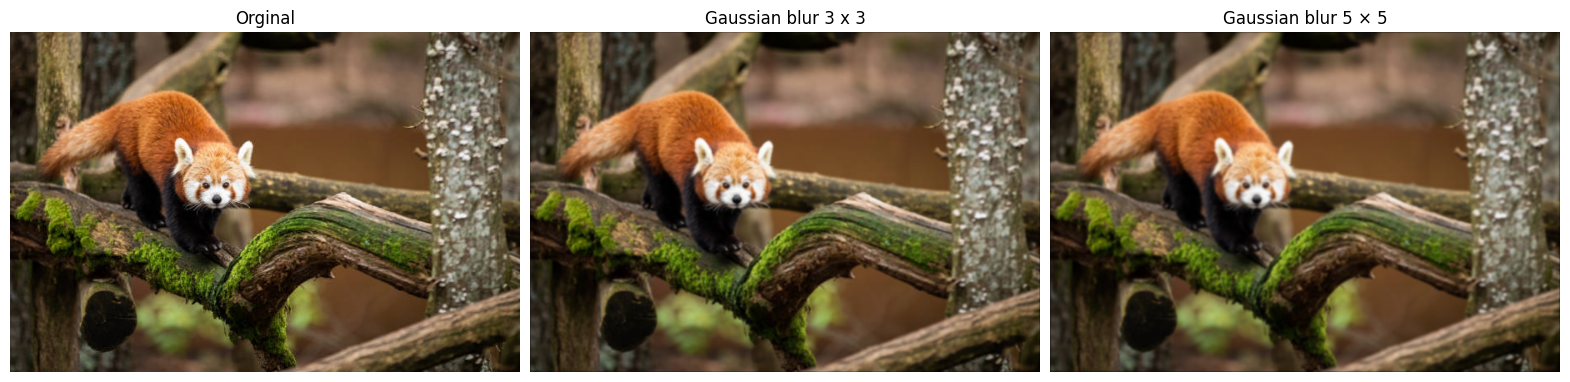

In [21]:
gaus_kernel3x3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
gaus_kernel5x5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16 ,4], [6, 24, 36, 24, 6], [4, 16, 24, 16 ,4], [1, 4, 6, 4, 1]]) / 256

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].imshow(image4)
axes[0].set_title('Orginal')
axes[0].axis('off')

axes[1].imshow(convolve_rgb(image4, gaus_kernel3x3))
axes[1].set_title('Gaussian blur 3 x 3')
axes[1].axis('off')

img_blur = convolve_rgb(image4, gaus_kernel5x5)
axes[2].imshow(img_blur)
axes[2].set_title('Gaussian blur 5 × 5')
axes[2].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=-0.4)
plt.show()

# **Sharp masking 5 × 5**

Based on Gaussian blur with amount as 1 and threshold as 0

1.0


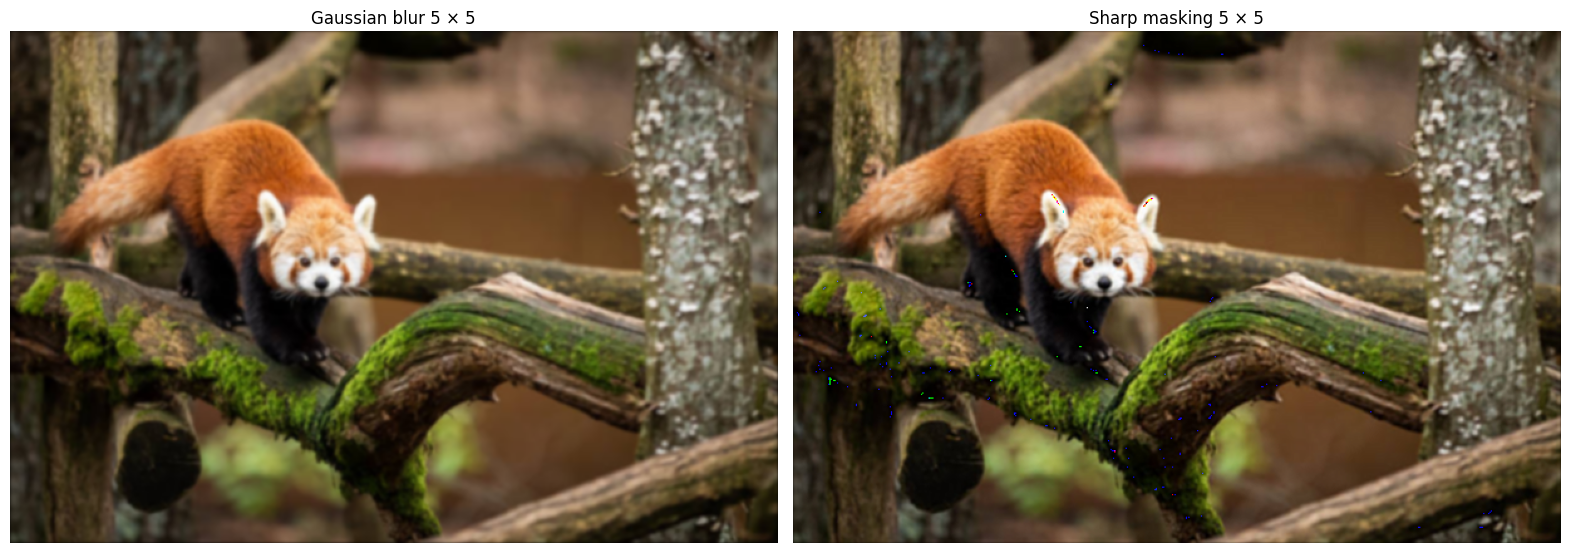

In [54]:
sharp_gausian = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16 ,4], [6, 24, -476, 24, 6], [4, 16, 24, 16 ,4], [1, 4, 6, 4, 1]]) / (-256)
print(sharp_gausian.sum())
fig, axes = plt.subplots(1, 2, figsize=(20, 15))

axes[0].imshow(img_blur)
axes[0].set_title('Gaussian blur 5 × 5')
axes[0].axis('off')

axes[1].imshow(convolve_rgb(img_blur, sharp_gausian))
axes[1].set_title('Sharp masking 5 × 5')
axes[1].axis('off')
plt.subplots_adjust(wspace=0.02)
plt.show()

# **Edge detection**

### Laplace operator

In [52]:
laplace1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]] )
laplace2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]] )

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

axes[0, 0].imshow(image3)
axes[0, 0].set_title('Orginal')
axes[0, 0].axis('off')

"""axes[0, 0].imshow(img_gray3, cmap='gray')
axes[0, 0].set_title('Orginal in gray scale')
axes[0, 0].axis('off')"""

axes[0, 1].imshow( convolve(img_gray3, laplace1, mode="constant", cval=0.0), cmap='gray')
axes[0, 1].set_title('Edge detection Laplace1')
axes[0, 1].axis('off')

"""axes[1, 0].imshow(image3)
axes[1, 0].set_title('Orginal')
axes[1, 0].axis('off')
"""
axes[1, 0].imshow(img_gray3, cmap='gray')
axes[1, 0].set_title('Orginal in gray scale')
axes[1, 0].axis('off')

axes[1, 1].imshow( convolve(img_gray3, laplace2, mode="constant", cval=0.0), cmap='gray')
axes[1, 1].set_title('Edge detection Laplace2')
axes[1, 1].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.002)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Sobel

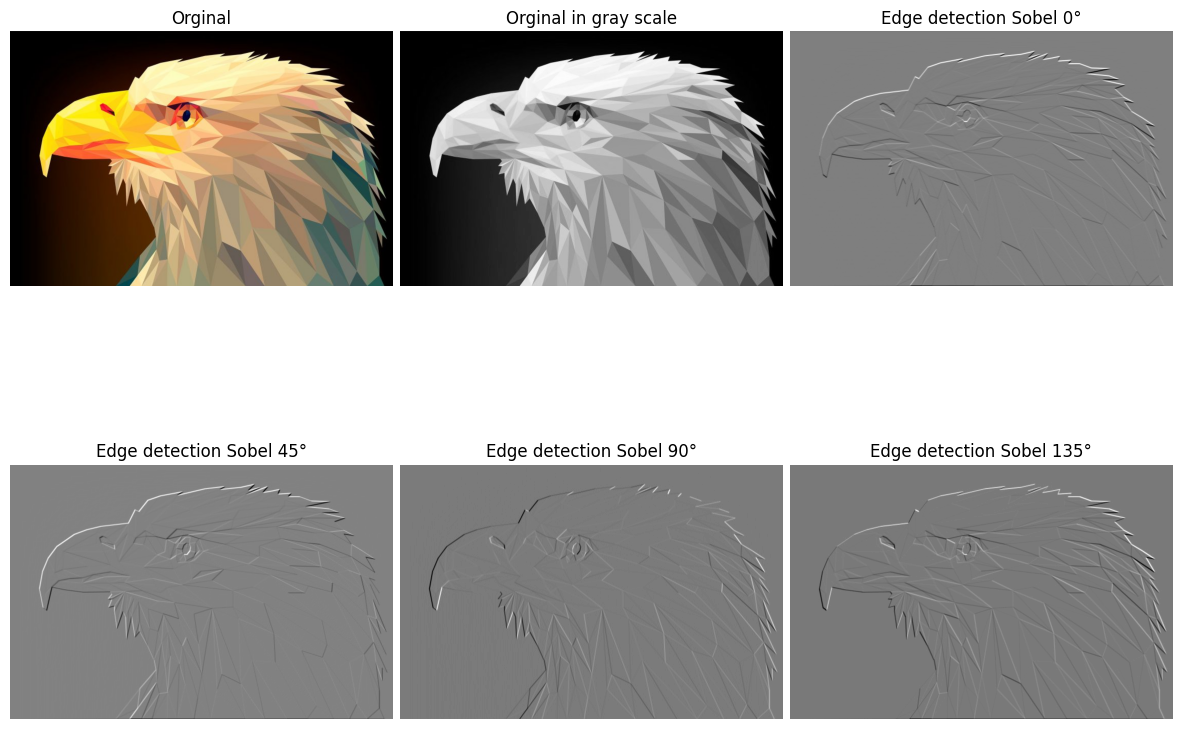

In [23]:
sobel_0_deg = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_45_deg = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]])
sobel_90_deg = np.array([[-1, 0, 1], [-2, 0, +2], [-1, 0, +1]])
sobel_135_deg = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])


fig, axes = plt.subplots(2, 3, figsize=(15, 15))

axes[0, 0].imshow(image2)
axes[0, 0].set_title('Orginal')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_gray2, cmap='gray')
axes[0, 1].set_title('Orginal in gray scale')
axes[0, 1].axis('off')

axes[0, 2].imshow( convolve(img_gray2, sobel_0_deg, mode="constant", cval=0.0), cmap='gray')
axes[0, 2].set_title('Edge detection Sobel 0°')
axes[0, 2].axis('off')

axes[1, 0].imshow(convolve(img_gray2, sobel_45_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 0].set_title('Edge detection Sobel 45°')
axes[1, 0].axis('off')

axes[1, 1].imshow(convolve(img_gray2, sobel_90_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 1].set_title('Edge detection Sobel 90°')
axes[1, 1].axis('off')

axes[1, 2].imshow(convolve(img_gray2, sobel_135_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 2].set_title('Edge detection Sobel 135°')
axes[1, 2].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=-0.4)
plt.show()

## Prewitt

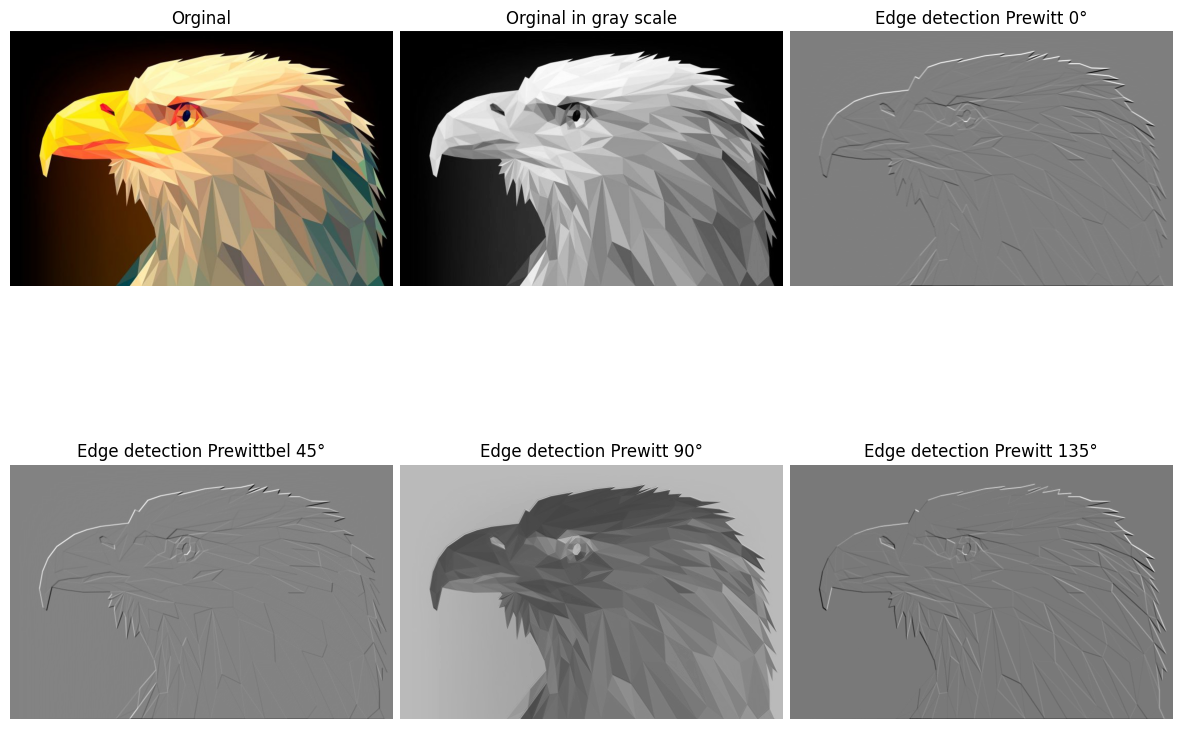

In [24]:
prewitt_0_deg = np.array([[1, 1, 1], [0, 0, 0], [-1, -1 ,-1]])
prewitt_45_deg = np.array([[1, 1, 0], [1, 0, -1], [0, -1 ,-1]])
prewitt_90_deg = np.array([[-1, 0, 1], [1, 0, -1], [0, -1 ,-1]])
prewitt_135_deg = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1 ,0]])

fig, axes = plt.subplots(2, 3, figsize=(15, 15))

axes[0, 0].imshow(image2)
axes[0, 0].set_title('Orginal')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_gray2, cmap='gray')
axes[0, 1].set_title('Orginal in gray scale')
axes[0, 1].axis('off')

axes[0, 2].imshow( convolve(img_gray2, prewitt_0_deg, mode="constant", cval=0.0), cmap='gray')
axes[0, 2].set_title('Edge detection Prewitt 0°')
axes[0, 2].axis('off')

axes[1, 0].imshow(convolve(img_gray2, prewitt_45_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 0].set_title('Edge detection Prewittbel 45°')
axes[1, 0].axis('off')

axes[1, 1].imshow(convolve(img_gray2, prewitt_90_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 1].set_title('Edge detection Prewitt 90°')
axes[1, 1].axis('off')

axes[1, 2].imshow(convolve(img_gray2, prewitt_135_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 2].set_title('Edge detection Prewitt 135°')
axes[1, 2].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=-0.4)
plt.show()

## Scharr

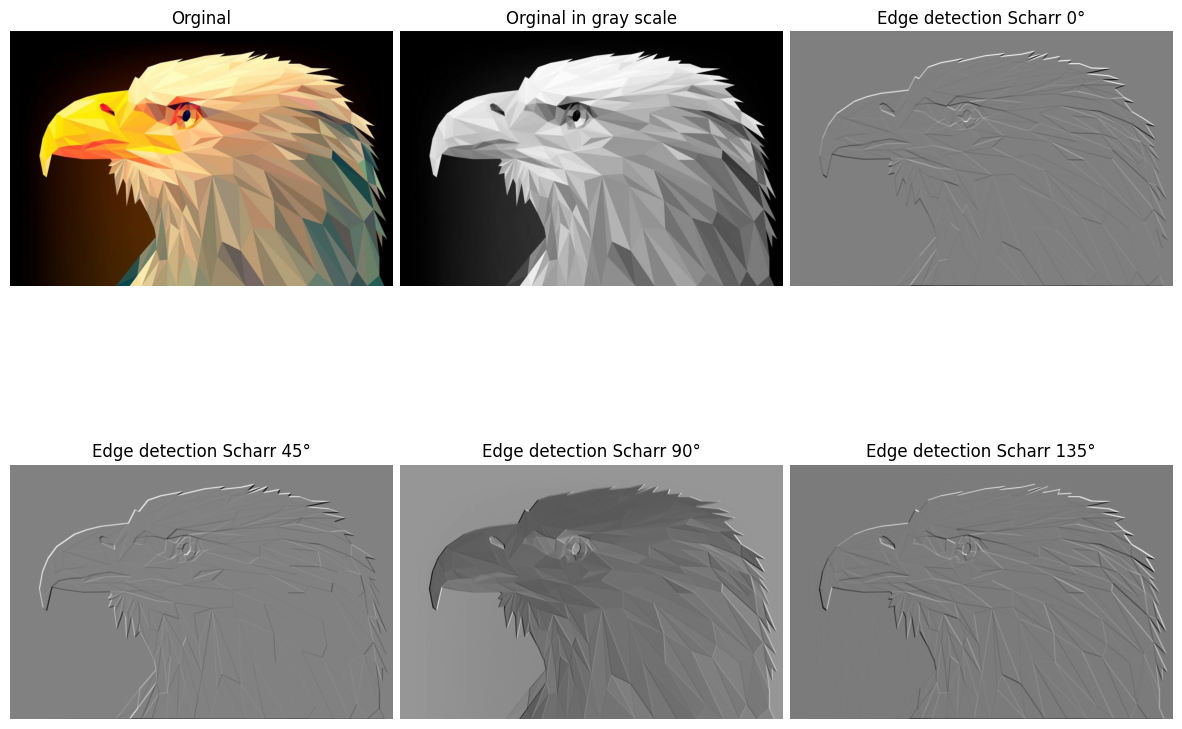

In [25]:
scharr_0_deg = np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]])
scharr_45_deg = np.array([[10, 3, 0], [3, 0, -3], [0, -3, -10]])
scharr_90_deg = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, -3]])
scharr_135_deg = np.array([[0, 3, 10], [-3, 0, 3], [-10, -3, 0]])

fig, axes = plt.subplots(2, 3, figsize=(15, 15))

axes[0, 0].imshow(image2)
axes[0, 0].set_title('Orginal')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_gray2, cmap='gray')
axes[0, 1].set_title('Orginal in gray scale')
axes[0, 1].axis('off')

axes[0, 2].imshow( convolve(img_gray2, scharr_0_deg, mode="constant", cval=0.0), cmap='gray')
axes[0, 2].set_title('Edge detection Scharr 0°')
axes[0, 2].axis('off')

axes[1, 0].imshow(convolve(img_gray2, scharr_45_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 0].set_title('Edge detection Scharr 45°')
axes[1, 0].axis('off')

axes[1, 1].imshow(convolve(img_gray2, scharr_90_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 1].set_title('Edge detection Scharr 90°')
axes[1, 1].axis('off')

axes[1, 2].imshow(convolve(img_gray2, scharr_135_deg, mode="constant", cval=0.0), cmap='gray')
axes[1, 2].set_title('Edge detection Scharr 135°')
axes[1, 2].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=-0.4)
plt.show()

# Sobel detector, composed of the sum of detections in the X and Y axes

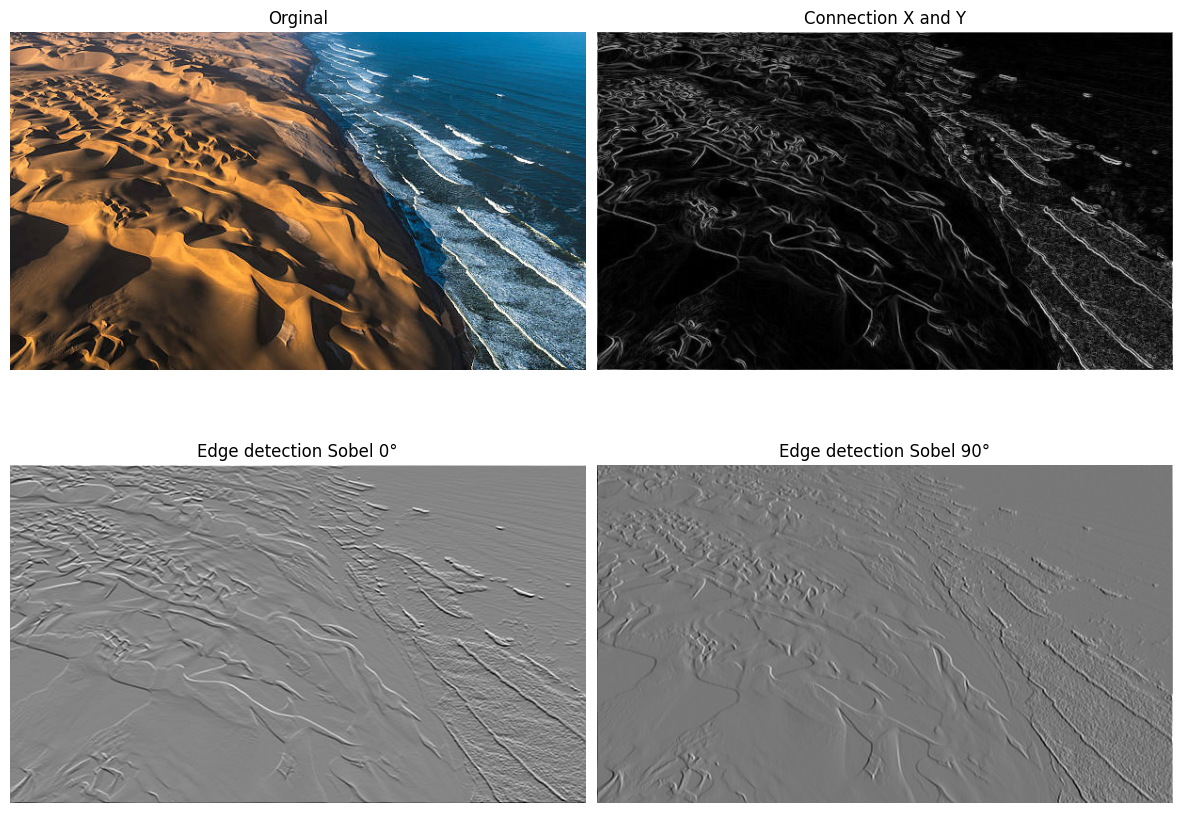

In [53]:
sobel_0_deg = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_90_deg = np.array([[-1, 0, 1], [-2, 0, +2], [-1, 0, +1]])

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

imgX = convolve(img_gray3, sobel_0_deg, mode="constant", cval=0.0)
imgY = convolve(img_gray3, sobel_90_deg, mode="constant", cval=0.0)
gradient_magnitude = np.sqrt(imgX**2 + imgY**2)
axes[0, 0].imshow(image3)
axes[0, 0].set_title('Orginal')
axes[0, 0].axis('off')

axes[0, 1].imshow(gradient_magnitude, cmap='gray')
axes[0, 1].set_title('Connection X and Y')
axes[0, 1].axis('off')

axes[1, 0].imshow(imgX, cmap='gray')
axes[1, 0].set_title('Edge detection Sobel 0°')
axes[1, 0].axis('off')

axes[1, 1].imshow(imgY, cmap='gray')
axes[1, 1].set_title('Edge detection Sobel 90°')
axes[1, 1].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=-0.4)
plt.show()